# Report

In [1]:
import pandas as pd
import polars as pl
import plotnine as pn
import dask.dataframe as dd

In [2]:
from dask.distributed import Client

Client()

/cvmfs/sling.si/modules/el7/software/Anaconda3/2021.11/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37813 instead


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:37813/status,
Dashboard: http://127.0.0.1:37813/status,Workers: 4
Total threads: 12,Total memory: 125.67 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33899,Workers: 4
Dashboard: http://127.0.0.1:37813/status,Total threads: 12
Started: Just now,Total memory: 125.67 GiB
Comm: tcp://127.0.0.1:36541,Total threads: 3
Dashboard: http://127.0.0.1:35463/status,Memory: 31.42 GiB
Nanny: tcp://127.0.0.1:33373,


In [3]:
files = ['./data/{0}.gz.parquet'.format(x) for x in range(2016,2023)]
#files = ['./data/2022.gz.parquet', './data/2021.gz.parquet']
df = dd.read_parquet(files)

In [4]:
df.min().compute()

/cvmfs/sling.si/modules/el7/software/Anaconda3/2021.11/lib/python3.9/site-packages/dask/utils.py:1015: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(obj, self.method)(*args, **kwargs)
/cvmfs/sling.si/modules/el7/software/Anaconda3/2021.11/lib/python3.9/site-packages/dask/utils.py:1015: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(obj, self.method)(*args, **kwargs)
/cvmfs/sling.si/modules/el7/software/Anaconda3/2021.11/lib/python3.9/site-packages/dask/utils.py:1015: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  S

index                                                                  0
Vehicle Year                                                           0
zipcode                                                            10001
Street name                                                        1 AVE
BOROCODE                                                               1
lng                                                           -74.040596
lat                                                             40.56772
cafe_count                                                             1
Violation Price                                                        0
Vehicle Color                                                      Black
time_of_ticket                                       1970-12-02 12:13:00
Closest_school_dist                                             0.000065
Closest_school_code                                                 K002
Closest_school_name    47 The American Sign Languag

In [5]:
df.max().compute()

/cvmfs/sling.si/modules/el7/software/Anaconda3/2021.11/lib/python3.9/site-packages/dask/utils.py:1015: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(obj, self.method)(*args, **kwargs)
/cvmfs/sling.si/modules/el7/software/Anaconda3/2021.11/lib/python3.9/site-packages/dask/utils.py:1015: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(obj, self.method)(*args, **kwargs)
/cvmfs/sling.si/modules/el7/software/Anaconda3/2021.11/lib/python3.9/site-packages/dask/utils.py:1015: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  S

index                                                   2235329
Vehicle Year                                               2069
zipcode                                                   11694
Street name                                         ZULETTE AVE
BOROCODE                                                      4
lng                                                   -73.78155
lat                                                   40.907249
cafe_count                                                   78
Violation Price                                             515
Vehicle Color                                            Yellow
time_of_ticket                              2069-07-12 07:50:00
Closest_school_dist                                    0.031704
Closest_school_code                                        X721
Closest_school_name    Young Women's Leadership School, Astoria
dtype: object

In [36]:
agg = { 'Violation Price': ['mean', 'std', 'count'] }

by_color = df.groupby('Vehicle Color').agg(agg).compute()
by_body_type = df.groupby('Vehicle Body Type').agg(agg).compute()
by_make = df.groupby('Vehicle Make').agg(agg).compute()
by_vehicle_year = df.groupby('Vehicle Year').agg(agg).compute()
by_borough = df.groupby('Borough Code').agg(agg).compute()

In [37]:
by_color.columns = ['price_mean', 'price_std', 'count']
by_color = by_color.reset_index()

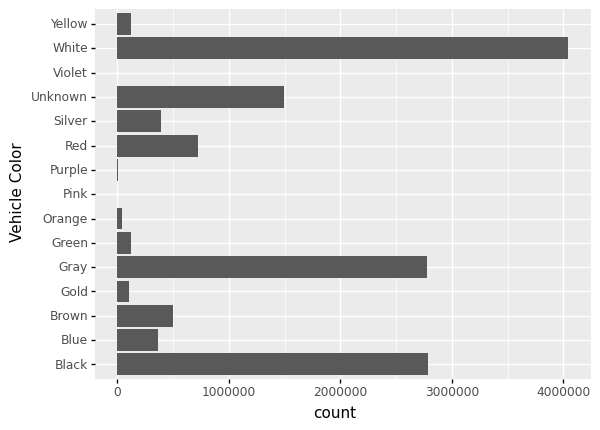

<ggplot: (1445945603012)>

In [38]:
pn.ggplot(by_color, pn.aes('Vehicle Color', 'count')) + pn.geom_col() + pn.coord_flip()

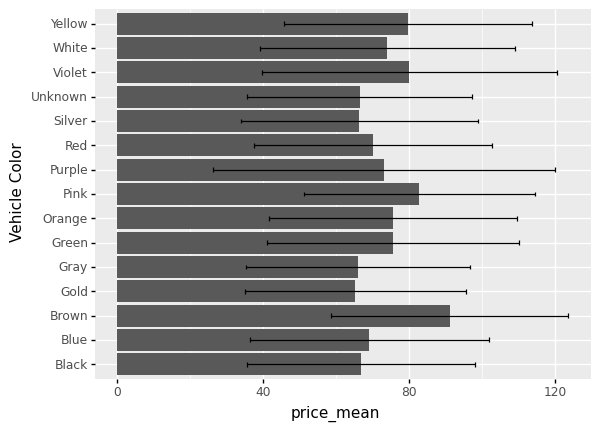

<ggplot: (1445987366099)>

In [39]:
(
  pn.ggplot(by_color, pn.aes('Vehicle Color', 'price_mean')) 
  + pn.geom_col()
  + pn.geom_errorbar(pn.aes(ymin='price_mean - price_std', ymax='price_mean + price_std'), width=.2)
  + pn.coord_flip()
)

In [40]:
by_body_type.columns = ['price_mean', 'price_std', 'count']
by_body_type = by_body_type[by_body_type['count'] > 100000].reset_index()

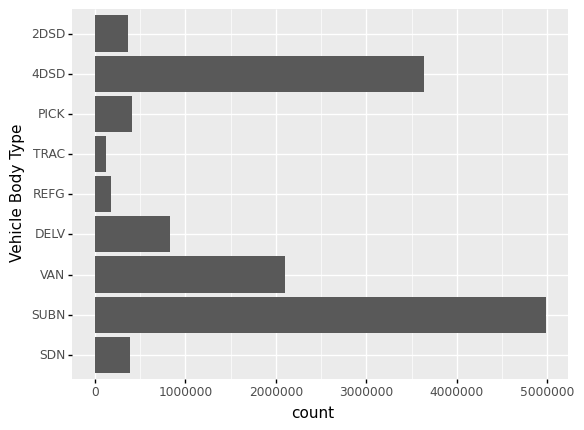

<ggplot: (1445987302154)>

In [41]:
pn.ggplot(by_body_type, pn.aes('Vehicle Body Type', 'count')) + pn.geom_col() + pn.coord_flip()

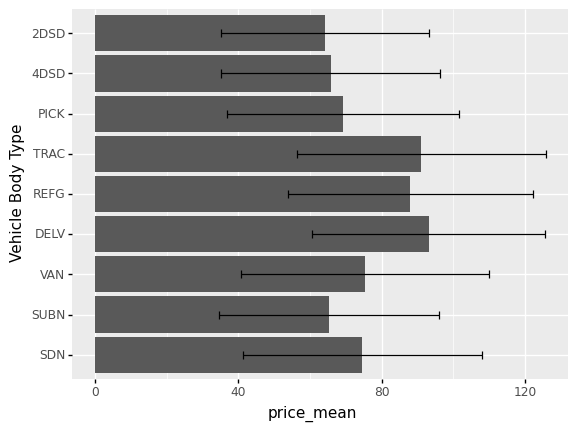

<ggplot: (1446028356078)>

In [42]:
(
  pn.ggplot(by_body_type, pn.aes('Vehicle Body Type', 'price_mean')) 
  + pn.geom_col()
  + pn.geom_errorbar(pn.aes(ymin='price_mean - price_std', ymax='price_mean + price_std'), width=.2)
  + pn.coord_flip()
)


In [43]:
by_make.columns = ['price_mean', 'price_std', 'count']
by_make = by_make[by_make['count'] > 100000].reset_index()

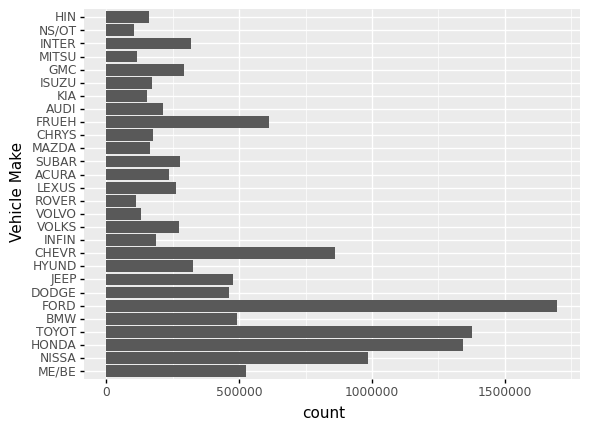

<ggplot: (1445989607446)>

In [44]:
pn.ggplot(by_make, pn.aes('Vehicle Make', 'count')) + pn.geom_col() + pn.coord_flip()

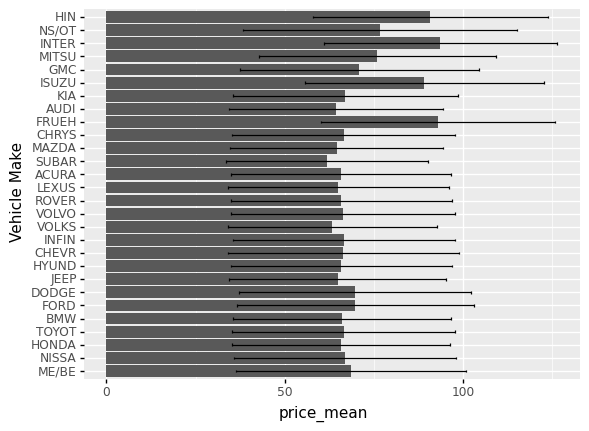

<ggplot: (1445903174690)>

In [45]:
(
  pn.ggplot(by_make, pn.aes('Vehicle Make', 'price_mean')) 
  + pn.geom_col()
  + pn.geom_errorbar(pn.aes(ymin='price_mean - price_std', ymax='price_mean + price_std'), width=.2)
  + pn.coord_flip()
)

In [46]:
a = pl.from_pandas(by_vehicle_year.reset_index())
a.columns = ['vehicle_year', 'price_mean', 'price_std', 'count']
by_vehicle_year = (a
  .filter(pl.col('vehicle_year') > 1970)
  .filter(pl.col('vehicle_year') < 2022)
  .to_pandas()
)

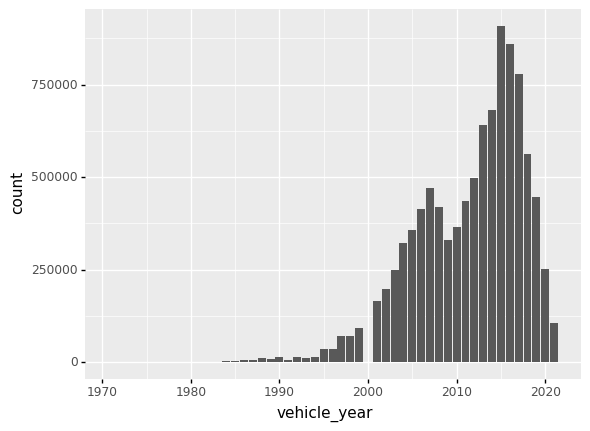

<ggplot: (1445903109340)>

In [47]:
pn.ggplot(by_vehicle_year, pn.aes('vehicle_year', 'count')) + pn.geom_col()

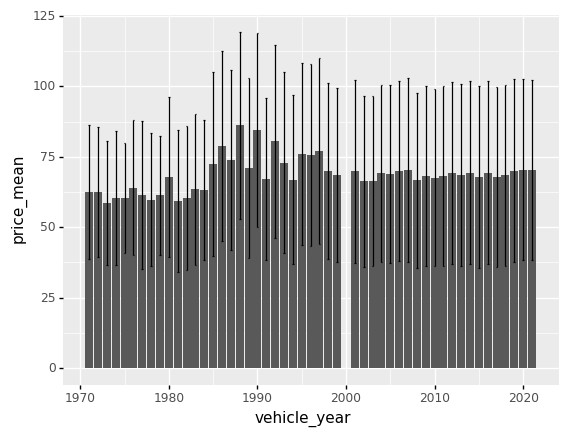

<ggplot: (1445903065591)>

In [48]:
(
  pn.ggplot(by_vehicle_year, pn.aes('vehicle_year', 'price_mean')) 
  + pn.geom_col()
  + pn.geom_errorbar(pn.aes(ymin='price_mean - price_std', ymax='price_mean + price_std'), width=.2)
)

In [49]:
by_borough.columns = ['price_mean', 'price_std', 'count']
by_borough = by_borough.reset_index()
by_borough['Borough Code'] = by_borough['Borough Code'].astype(int)

borough_codes = pd.DataFrame([
  [1, 'Manhattan'],
  [2, 'The Bronx'],
  [3, 'Brooklyn'],
  [4, 'Queens'],
  [5, 'Staten Island'],
], columns = ['Borough Code', 'Borough'])

by_borough = by_borough.set_index('Borough Code').join(borough_codes.set_index('Borough Code'))

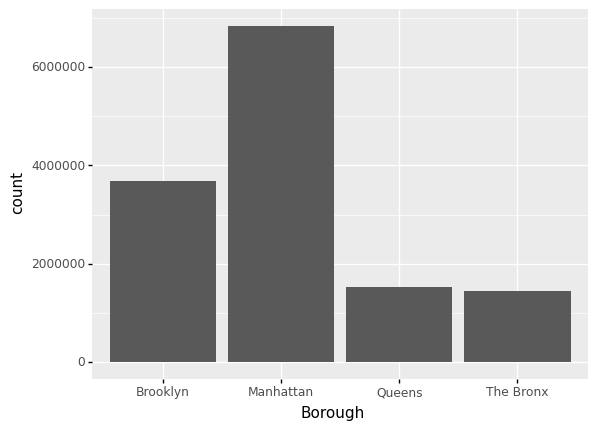

<ggplot: (1445905350328)>

In [50]:
pn.ggplot(by_borough, pn.aes('Borough', 'count')) + pn.geom_col()

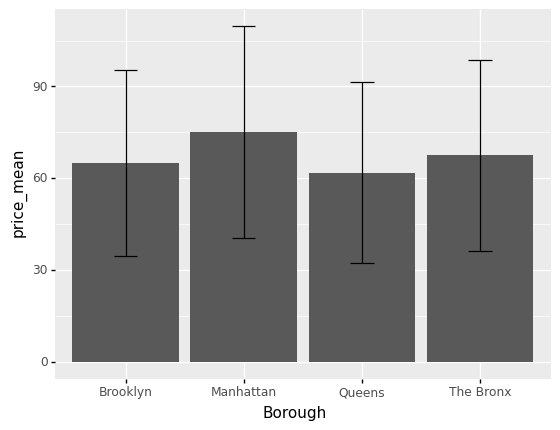

<ggplot: (1445903058192)>

In [51]:
(
  pn.ggplot(by_borough, pn.aes('Borough', 'price_mean')) 
  + pn.geom_col()
  + pn.geom_errorbar(pn.aes(ymin='price_mean - price_std', ymax='price_mean + price_std'), width=.2)
)

# Other

In [ ]:
import polars as pl
import pandas as pd
import plotnine as pn

In [ ]:
df = pl.read_parquet('./data/2022.gz.parquet')
df.head()

In [ ]:
df = df.with_columns([
    pl.col('Vehicle Body Type').cast(pl.Categorical),
    pl.col('Vehicle Make').cast(pl.Categorical),
    pl.col('Plate Type').cast(pl.Categorical),
    pl.col('Issuing Agency').cast(pl.Categorical),
    pl.col('Law Section').cast(pl.Utf8).cast(pl.Categorical),
])
df.head()

## Counts

In [ ]:
df_counts = (df
    .select(['Vehicle Body Type', 'Vehicle Make', 'Plate Type', 'Issuing Agency', 'Law Section',])
    .to_pandas()
    .melt()
    .groupby(['variable', 'value'])[['value']]
    .count()
    .rename({ 'value': 'count'}, axis=1)
    .reset_index()
)
df_counts


In [ ]:
df_counts.value_counts('variable')

In [ ]:
pn.ggplot(df_counts, pn.aes(x = 'value', y = 'count')) + pn.geom_col() + pn.facet_wrap('variable', scales='free')

## Issuer

In [ ]:
df_issuers = df.select([
    'Violation Location',
    'Violation Precinct',
    'Issuer Precinct',
    'Issuer Code',
    'Issuer Command',
    'Issuer Squad',
]).melt().to_pandas().value_counts()

In [ ]:
pd.DataFrame({ 'count': df_issuers }).reset_index().value_counts('variable')

In [ ]:
df.select(['Issuer Precinct']).groupby('Issuer Precinct').count().sort(pl.col('Issuer Precinct')).to_csv('precincts.csv')

In [ ]:
(pn.ggplot(df.select(['Issuer Code']).groupby('Issuer Code').count().filter(pl.col('count') < 100000).to_pandas())
    + pn.geom_histogram(pn.aes(x = 'count'), bins=50)
    + pn.scale_x_log10()
    + pn.scale_y_log10()
    + pn.xlab('number of violations issued by an issuer')
    + pn.ylab('count of issuers')
)

In [ ]:
df.select(['Issuer Code']).groupby('Issuer Code').count().filter(pl.col('count') > 100000)

## Misc

In [ ]:
df.select(['Violation Location']).groupby('Violation Location').count().sort(pl.col('Violation Location'))

In [ ]:
(pn.ggplot(df
        .select('Vehicle Year')
        .filter(pl.col('Vehicle Year') > 0)
        .filter(pl.col('Vehicle Year') <= 2022)
        .groupby('Vehicle Year').count()
        .to_pandas()
    ) +
    pn.geom_line(pn.aes(x = 'Vehicle Year', y = 'count'))
)

In [ ]:
df_makes = (df
    .select('Vehicle Make')
    .groupby('Vehicle Make')
    .count()
    .filter(pl.col('count') > 50000)
    .filter(pl.col('Vehicle Make') != None)
    .sort('count')
    .with_column(pl.col('Vehicle Make').cast(pl.Categorical))
)

(pn.ggplot(df_makes.to_pandas())
    + pn.geom_col(pn.aes(x = 'Vehicle Make', y = 'count'))
    + pn.coord_flip()
)

# Distributions over variables